### Regresión lineal

In [162]:
# importar librerías para modelos de regresión lineal

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [163]:
# modelo lineal simple

# importar datos
data = pd.read_csv('../data_raw/Automobile price data _Raw_.csv')

print(data.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   
2          1               NaN  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

In [164]:
# revisar datos

print(data.describe())

        symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.843902   98.756585  174.049268   65.907805   53.724878   
std      1.238684    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size        bore      stroke  compression-ratio  \
count   205.000000   205.000000  201.000000  201.000000         205.000000   
mean   2555.565854   126.907317    3.329751    3.255423          10.142537   
std     520.680204    41.642693    0.273539    0.316717           3.972040   
min    1488.000000    61.000000    2.540000    2.070000           

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  166 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [166]:
# limpiar datos nulos

data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          161 non-null    int64  
 1   normalized-losses  161 non-null    object 
 2   make               161 non-null    object 
 3   fuel-type          161 non-null    object 
 4   aspiration         161 non-null    object 
 5   num-of-doors       161 non-null    object 
 6   body-style         161 non-null    object 
 7   drive-wheels       161 non-null    object 
 8   engine-location    161 non-null    object 
 9   wheel-base         161 non-null    float64
 10  length             161 non-null    float64
 11  width              161 non-null    float64
 12  height             161 non-null    float64
 13  curb-weight        161 non-null    int64  
 14  engine-type        161 non-null    object 
 15  num-of-cylinders   161 non-null    object 
 16  engine-size        161 non-null

In [167]:
# seleccionar variables

X = data['engine-size'].values.reshape(-1,1)
y = data['price'].values.reshape(-1,1)

print(X.shape)
print(y.shape)

(161, 1)
(161, 1)


In [168]:
# dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(128, 1)
(33, 1)
(128, 1)
(33, 1)


In [169]:
# crear modelo

model = LinearRegression()
model.fit(X_train, y_train)

# predecir valores

y_pred = model.predict(X_test)

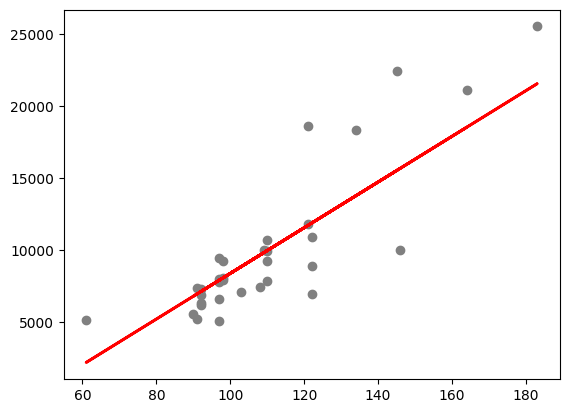

In [170]:
# graficar

plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [171]:
# resultados de la regresión

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
print('Mean squared error:', mean_squared_error(y_test, y_pred))


Intercept: [-7474.00109361]
Coefficients: [[158.72115788]]
Mean squared error: 7480255.982252573


In [172]:
# calcular mse

mse = np.mean((y_pred - y_test)**2)
print('Mean squared error:', mse)

Mean squared error: 7480255.982252573


In [173]:
# evaluación del modelo

print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.7161942108029229
0.6983681790502828


In [174]:
# usar OLS Regression Results

import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     291.7
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           1.36e-34
Time:                        20:13:19   Log-Likelihood:                -1217.7
No. Observations:                 128   AIC:                             2439.
Df Residuals:                     126   BIC:                             2445.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7474.0011   1171.830     -6.378      0.0

In [175]:
# # probar el modelo OLS

# X_test = sm.add_constant(X_test)
# y_pred = model.predict(X_test)

# print('Mean squared error:', mean_squared_error(y_test, y_pred))
# print(model.rsquared)


In [176]:
print(y_pred.reshape(-1,1).shape)

print(y_test.shape)

(33, 1)
(33, 1)


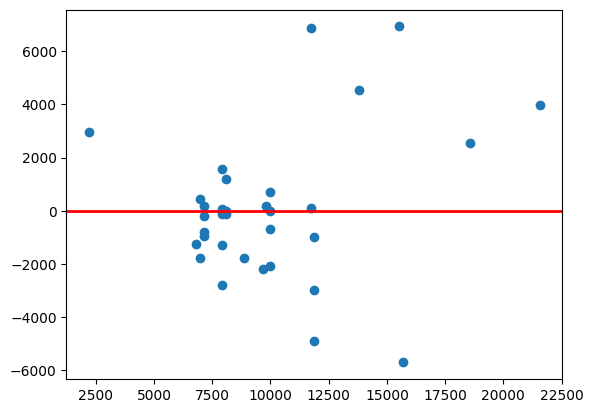

In [177]:
# evaluación de residuales

residuals = y_test - y_pred.reshape(-1,1)

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linewidth=2)
plt.show()

47.86195645753535


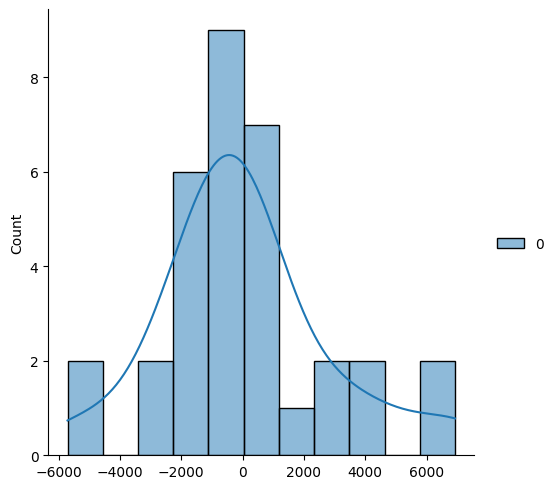

In [178]:
# media de residuales

print(np.mean(residuals))

# distribución de residuales con curva de densidad

import seaborn as sns

sns.displot(residuals, kde=True)
plt.show()

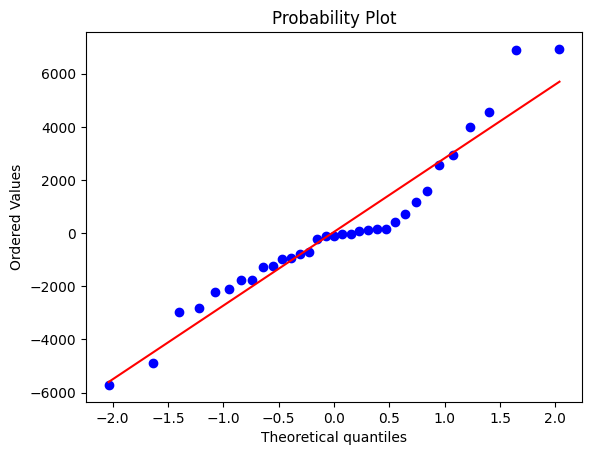

In [179]:
# normalidad de residuales

import scipy.stats as stats

stats.probplot(residuals.flatten(), plot=plt, dist='norm', fit=True)
plt.show()

In [180]:
# mediana de residuales

print(np.median(residuals))

-122.95122076110056


In [181]:
# estimación de S^2

print(np.sum(residuals**2)/(len(y_test)-2))

7962853.1423979


In [182]:
# validación de supuestos de regresión lineal

# normalidad

# h0: los residuales siguen una distribución normal
# h1: los residuales no siguen una distribución normal

stats.shapiro(residuals)

# presentar en tabla

from scipy.stats import shapiro

shapiro_test = shapiro(residuals)

print(shapiro_test)
print(shapiro_test[1] < 0.05)

# conclusiones

# los residuales no siguen una distribución normal


ShapiroResult(statistic=np.float64(0.9342865690595001), pvalue=np.float64(0.046425079166759545))
True


In [183]:
# prueba de jarque-bera

# h0: los residuales siguen una distribución normal
# h1: los residuales no siguen una distribución normal

stats.jarque_bera(residuals)

# presentar en tabla

from scipy.stats import jarque_bera

jarque_bera_test = jarque_bera(residuals)

print(jarque_bera_test)

SignificanceResult(statistic=np.float64(3.353033298278347), pvalue=np.float64(0.18702431400936076))


In [184]:
# prueba de homocedasticidad

# h0: los residuales del modelo tienen varianza constante (homocedasticidad)
# h1: los residuales del modelo no tienen varianza constante (heterocedasticidad)

stats.levene(y_test.flatten(), residuals.flatten())

# presentar en tabla

from scipy.stats import levene

levene_test = levene(y_test.flatten(), residuals.flatten())

print(levene_test)


LeveneResult(statistic=np.float64(2.4937341420228436), pvalue=np.float64(0.1192304699351238))


In [185]:
# con F de fisher para probar la homocedasticidad

from scipy.stats import f_oneway

f_test = f_oneway(y_test.flatten(), residuals.flatten())

print(f_test)

F_onewayResult(statistic=np.float64(93.3932380625634), pvalue=np.float64(3.983753879111558e-14))


In [186]:
# prueba de independencia

# valores de Durbin-Watson entre 0 y 2,
# si es cercano a 2, los residuales son independientes
# si es cercano a 0, los residuales no son independientes

# h0: los residuales son independientes
# h1: los residuales no son independientes

from statsmodels.stats.stattools import durbin_watson

durbin_watson(residuals)

# presentar en tabla

print(durbin_watson(residuals))

[2.45572616]


In [187]:
# prueba de contraste para el intercepto obtenido en el modelo

# h0: el intercepto es igual a 0
# h1: el intercepto es diferente de 0

stats.ttest_1samp(model.params[0], 0)



c:\Users\ingen\Documents\estudio\especializacion_ml\esp_ml_env\Lib\site-packages\scipy\stats\_stats_py.py:1114: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\ingen\Documents\estudio\especializacion_ml\esp_ml_env\Lib\site-packages\scipy\stats\_stats_py.py:1114: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


TtestResult(statistic=np.float64(nan), pvalue=np.float64(nan), df=np.int64(0))

In [188]:
# prueba de contraste para los coeficientes

# h0: el coeficiente es igual a 0
# h1: el coeficiente es diferente de 0

t_test = stats.ttest_1samp(model.params[1], 0)

print(t_test)



TtestResult(statistic=np.float64(nan), pvalue=np.float64(nan), df=np.int64(0))


In [189]:
model

In [190]:
#  analisis de varianza (ANOVA) con F de fisher formulado

# h0: los coeficientes son iguales a 0
# h1: los coeficientes no son iguales a 0

from scipy.stats import f

f_test = f(model.fvalue, model.df_model, model.df_resid)

print(f_test)


In [191]:
# coeficiente de determinación ajustado

# R^2 ajustado = 1 - (1 - R^2) * (n - 1) / (n - p - 1)

n = len(y_test)
p = 1

r2 = model.rsquared
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(r2_adj)

0.6886381203099692
